# CЕМИНАР 2: ПОЛЕЗНЫЕ ФУНКЦИИ, МОДЕЛИРОВАНИЕ РАСПРЕДЕЛЕНИЙ И МЕТОД МОНТЕ-КАРЛО

На вводных лекциях мы познакомились с понятиями вероятности (в задачах с разными постановками), случайных величин, их распределений и плотности

В качестве первой практики попробуем поработать с самыми простыми способами моделирования реальных процессов, а также рассмотрим метод Монте-Карло и где он может быть полезен


In [1]:
import math
import random
from collections import Counter

import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import scipy.stats as stats
import seaborn as sns
from plotly.subplots import make_subplots

## Полезные инструменты

In [2]:
# настройка отображения графиков в matplotlib

plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('seaborn-v0_8-whitegrid')
# параметр для задания толщины линии
plt.rcParams['lines.linewidth'] = 1
# параметр для задания ширины точек
plt.rcParams['lines.markersize'] = 3
# параметр для задания шрифта осей x и y (цифр на осях)
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
# параметр для задания шрифта на осях 
plt.rcParams['legend.fontsize'] = 14
# параметр для задания шрифта заголовка
plt.rcParams['axes.titlesize'] = 18
# параметр для задания шрифта осей x и y (название оси)
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['figure.figsize'] = (8.0, 4.0)
# параметр для задания шрифта вспомагательных записей на графику (annotate или text)
plt.rcParams['font.size'] = 10

In [3]:
rng = np.random.default_rng(42)  # seed для воспроизводимости добавлять в каждую ячейку, если требуется повторение результата

# Базовые генерации из равномерного распределения
print("Случайное число от 0 до 1:", rng.random()) # непрерывное на интервале [0, 1]
print("Случайное целое от 1 до 10:", rng.integers(1, 11)) # дискретное на интервале [1, 10]
print("5 случайных чисел от 0 до 1:", rng.random(5)) # непрерывное на интервале [0, 1] n раз
print("Массив 3x3 случайных чисел:")
print("Массив 3x3 случайных чисел:", rng.random((3, 3)))

Случайное число от 0 до 1: 0.7739560485559633
Случайное целое от 1 до 10: 7
5 случайных чисел от 0 до 1: [0.85859792 0.69736803 0.09417735 0.97562235 0.7611397 ]
Массив 3x3 случайных чисел:
Массив 3x3 случайных чисел: [[0.78606431 0.12811363 0.45038594]
 [0.37079802 0.92676499 0.64386512]
 [0.82276161 0.4434142  0.22723872]]


In [4]:
# Выборка из списка
rng = np.random.default_rng(42)
hses = ['Москва', 'Нижний', 'СПБ', 'Пермь']
print("Случайный 'город:", rng.choice(hses))
print("Случайные города с повторениями:", rng.choice(hses, size=4, replace=True))
print("Случайные города без повторений:", rng.choice(hses, size=4, replace=False))

Случайный 'город: Москва
Случайные города с повторениями: ['Пермь' 'СПБ' 'Нижний' 'Нижний']
Случайные города без повторений: ['СПБ' 'Нижний' 'Пермь' 'Москва']


In [5]:
# Перемешивание массива
cards = ['A♠', 'K♠', 'Q♠', 'J♠', '10♠']
shuffled_cards = rng.permutation(cards)
print("Перемешанные карты:", shuffled_cards)

Перемешанные карты: ['Q♠' '10♠' 'A♠' 'J♠' 'K♠']


In [6]:
### Комбинаторные функции

from scipy.special import comb
from itertools import permutations, combinations, combinations_with_replacement, product

# Перестановки без повторений
values = list(permutations("АБВ"))
print(values)

# Сочетания без повторений
values = list(combinations("АБВ", 2))
print(values)

# Сочетания с повторениями
items = ['A', 'B']
print(list(combinations_with_replacement(items, 2))) 


# Размещения без повторений
print(list(permutations('AБВ', 2)))

# Размещения с повторениями
print(list(product('АБВГ', repeat=2)))


### Иногда прежде, чем выводить список, стоит оценить его длину, чтобы не перегрузить память:)

# Число сочетаний без повторений
# C(n, k) - число способов выбрать k элементов из n
print(comb(5, 2))       # 10.0

# Число сочетаний с повторениями
print(comb(5, 2, repetition=True))  # 15

[('А', 'Б', 'В'), ('А', 'В', 'Б'), ('Б', 'А', 'В'), ('Б', 'В', 'А'), ('В', 'А', 'Б'), ('В', 'Б', 'А')]
[('А', 'Б'), ('А', 'В'), ('Б', 'В')]
[('A', 'A'), ('A', 'B'), ('B', 'B')]
[('A', 'Б'), ('A', 'В'), ('Б', 'A'), ('Б', 'В'), ('В', 'A'), ('В', 'Б')]
[('А', 'А'), ('А', 'Б'), ('А', 'В'), ('А', 'Г'), ('Б', 'А'), ('Б', 'Б'), ('Б', 'В'), ('Б', 'Г'), ('В', 'А'), ('В', 'Б'), ('В', 'В'), ('В', 'Г'), ('Г', 'А'), ('Г', 'Б'), ('Г', 'В'), ('Г', 'Г')]
10.0
15.0


In [7]:
# Генерация распределений

size = 100000

# Нормальное распределение
normal_data = rng.normal(loc=0, scale=1, size=size)  # loc - среднее, scale - STD

# Равномерное распределение
uniform_data = rng.uniform(low=0, high=10,  size=size)

# Биномиальное распределение
# 10 испытаний, вероятность успеха 0.5, 1000 экспериментов
binomial_data = rng.binomial(n=10, p=0.5,  size=size)

# Пуассоновское распределение (редкие события)
poisson_data = rng.poisson(lam=3,  size=size)  # lam - среднее количество событий

# Показательное распределение (время между событиями)
exponential_data = rng.exponential(scale=2,  size=size)

In [8]:
# Вывод основных описательных статистик

print("Нормальное распределение:")
print(f"Среднее: {normal_data.mean():.2f}")
print(f"Стандартное отклонение: {normal_data.std():.2f}")
print(f"Медиана: {np.median(normal_data):.2f}")
print(f"Минимум: {normal_data.min():.2f}")
print(f"Максимум: {normal_data.max():.2f}")

Нормальное распределение:
Среднее: -0.00
Стандартное отклонение: 1.00
Медиана: -0.01
Минимум: -4.39
Максимум: 5.01


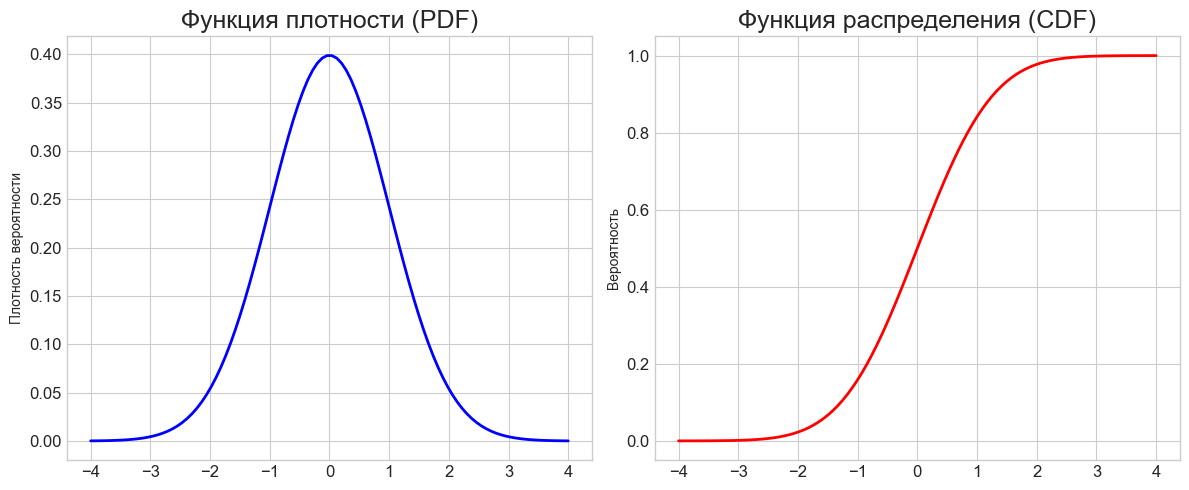

Квантили нормального распределения:
P(X ≤ -2.33) = 0.01
P(X ≤ -1.64) = 0.05
P(X ≤ -0.67) = 0.25
P(X ≤ 0.00) = 0.5
P(X ≤ 0.67) = 0.75
P(X ≤ 1.64) = 0.95
P(X ≤ 2.33) = 0.99


In [9]:
# Функция плотности вероятности (PDF) и функция распределения (CDF)

x = np.linspace(-4, 4, 100)
pdf = stats.norm.pdf(x)  # Probability Density Function, по умолчанию: mean=0, std=1
cdf = stats.norm.cdf(x)  # Cumulative Distribution Function

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.plot(x, pdf, 'b-', linewidth=2)
ax1.set_title('Функция плотности (PDF)')
ax1.set_ylabel('Плотность вероятности')

ax2.plot(x, cdf, 'r-', linewidth=2)
ax2.set_title('Функция распределения (CDF)')
ax2.set_ylabel('Вероятность')

plt.tight_layout()
plt.show()

# %%
# Квантили распределения
alphas = [0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99]
quantiles = stats.norm.ppf(alphas)  # Percent Point Function

print("Квантили нормального распределения:")
for p, q in zip(alphas, quantiles):
    print(f"P(X ≤ {q:.2f}) = {p}")

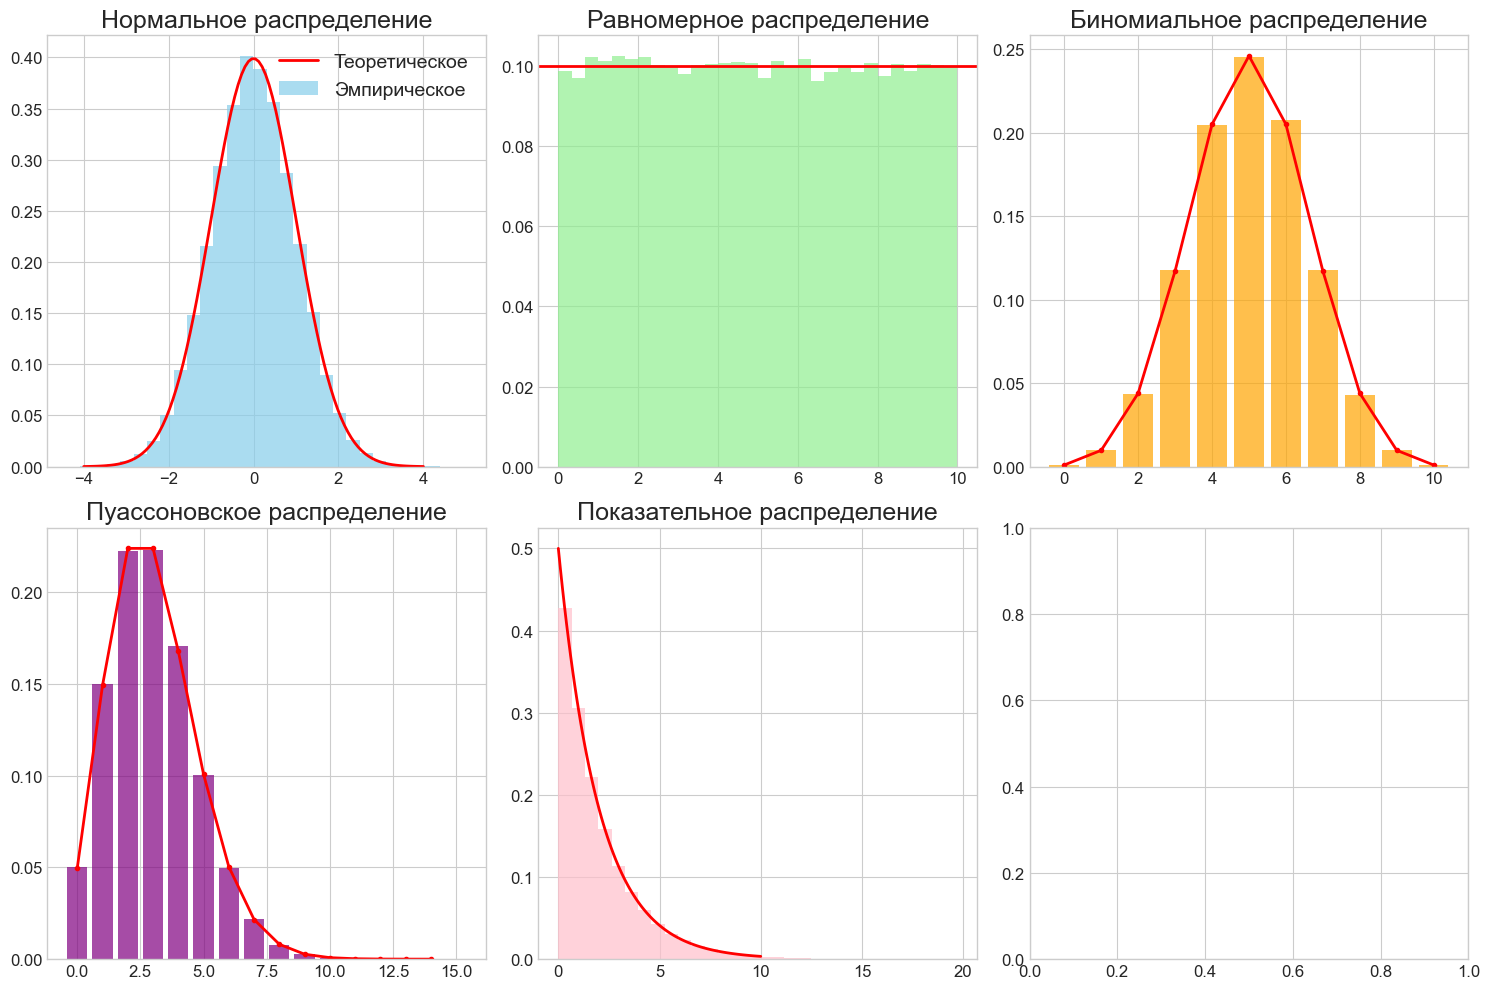

In [10]:
# Сравним теоретические и эмпирические распределения по графикам плотности

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Нормальное распределение
axes[0, 0].hist(normal_data, bins=30, density=True, alpha=0.7, color='skyblue')
x = np.linspace(-4, 4, 100)
axes[0, 0].plot(x, stats.norm.pdf(x), 'r-', linewidth=2)
axes[0, 0].set_title('Нормальное распределение')
axes[0, 0].legend(['Теоретическое', 'Эмпирическое'])

# Равномерное распределение
axes[0, 1].hist(uniform_data, bins=30, density=True, alpha=0.7, color='lightgreen')
x = np.linspace(0, 10, 100)
axes[0, 1].axhline(1/10, color='red', linewidth=2)
axes[0, 1].set_title('Равномерное распределение')

# Биномиальное распределение
bin_counts = Counter(binomial_data)
x_vals = list(bin_counts.keys())
y_vals = [bin_counts[x] / len(binomial_data) for x in x_vals]
axes[0, 2].bar(x_vals, y_vals, alpha=0.7, color='orange')
# Теоретическое биномиальное распределение
x_theor = np.arange(0, 11)
y_theor = stats.binom.pmf(x_theor, n=10, p=0.5)
axes[0, 2].plot(x_theor, y_theor, 'ro-', linewidth=2)
axes[0, 2].set_title('Биномиальное распределение')

# Пуассоновское распределение
poisson_counts = Counter(poisson_data)
x_vals = list(poisson_counts.keys())
y_vals = [poisson_counts[x] / len(poisson_data) for x in x_vals]
axes[1, 0].bar(x_vals, y_vals, alpha=0.7, color='purple')
# Теоретическое распределение Пуассона
x_theor = np.arange(0, 15)
y_theor = stats.poisson.pmf(x_theor, mu=3)
axes[1, 0].plot(x_theor, y_theor, 'ro-', linewidth=2)
axes[1, 0].set_title('Пуассоновское распределение')

# Показательное распределение
axes[1, 1].hist(exponential_data, bins=30, density=True, alpha=0.7, color='pink')
x = np.linspace(0, 10, 100)
axes[1, 1].plot(x, stats.expon.pdf(x, scale=2), 'r-', linewidth=2)
axes[1, 1].set_title('Показательное распределение')


plt.tight_layout()
plt.show()

## Метод Монте-Карло

Метод Монте-Карло подразумевает моделирование вероятностных процессов через массовое случайное генерирование и статистическую обработку результатов

* Генерируем много случайных исходов

* Вычисляем нужные статистики (приближаем вероятность, значение случайной величины и тд...)

Рассмотрим несколько классических иллюстраций работы метода Монте-Карло

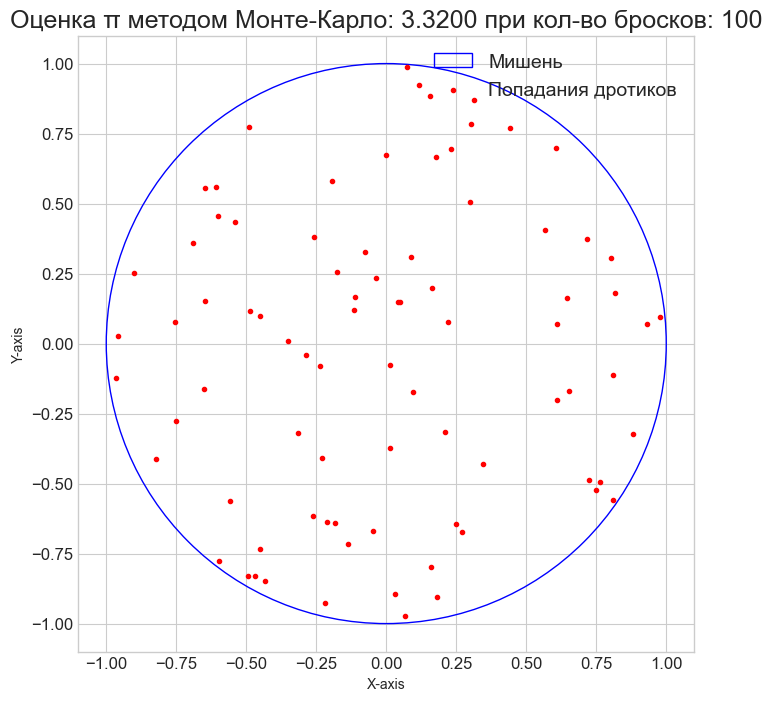

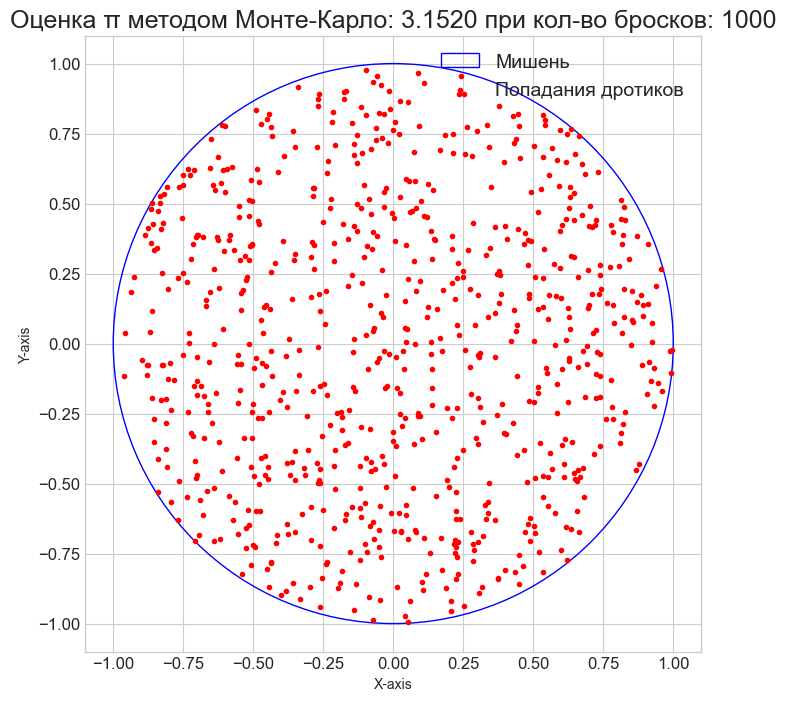

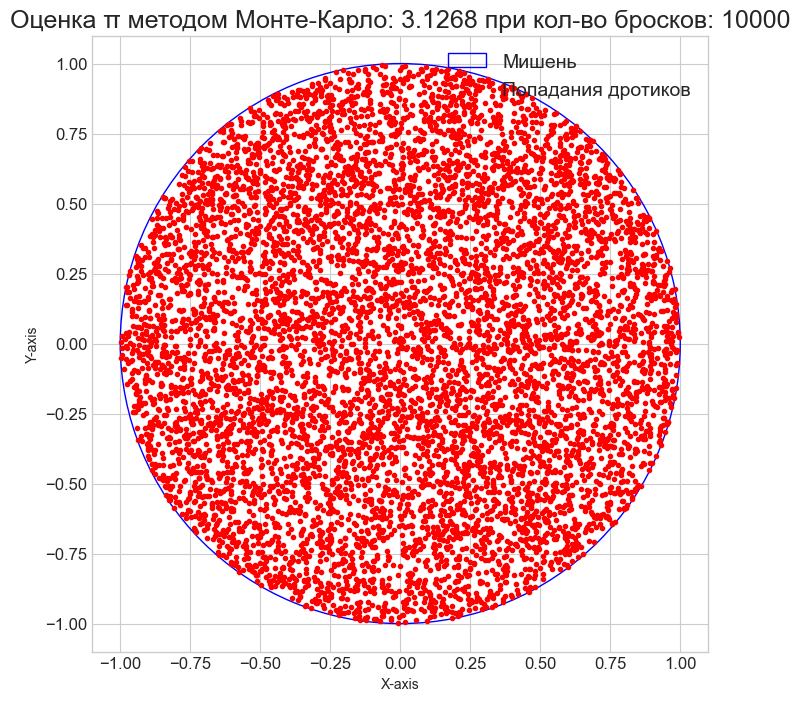

In [11]:
# Оценка числа пи
def estimate_pi_with_dartboard_visualization(num_darts):
    inside_circle = 0
    x_inside, y_inside = [], []

    dartboard_radius = 1.0 # Радиус мишени
    dartboard_center = (0, 0) # Центр мишени

    for _ in range(num_darts):
        
        x = random.uniform(-dartboard_radius, dartboard_radius)
        y = random.uniform(-dartboard_radius, dartboard_radius)
        distance = x**2 + y**2

        if distance <= dartboard_radius**2:
            inside_circle += 1
            x_inside.append(x)
            y_inside.append(y)

    estimated_pi = 4 * inside_circle / num_darts

    # Для красоты и наглядности
    fig, ax = plt.subplots(figsize=(8, 8))
    circle = plt.Circle(dartboard_center, dartboard_radius, color='b', fill=False, label='Мишень')
    ax.add_patch(circle)
    plt.scatter(x_inside, y_inside, color='r', marker='o', label='Попадания дротиков')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title(f'Оценка π методом Монте-Карло: {estimated_pi:.4f} при кол-во бросков: {num_darts}')
    plt.legend(loc='upper right')
    plt.gca().set_aspect('equal', adjustable='box')
    plt.xlim(-dartboard_radius - 0.1, dartboard_radius + 0.1)
    plt.ylim(-dartboard_radius - 0.1, dartboard_radius + 0.1)
    plt.grid(True)
    plt.show()

    return estimated_pi

# Запустим эксперимент 100 раз
num_darts = 100
estimated_pi = estimate_pi_with_dartboard_visualization(num_darts)

# А теперь 1000 раз...
num_darts = 1000
estimated_pi = estimate_pi_with_dartboard_visualization(num_darts)

# И еще на порядок больше
num_darts = 10000
estimated_pi = estimate_pi_with_dartboard_visualization(num_darts)

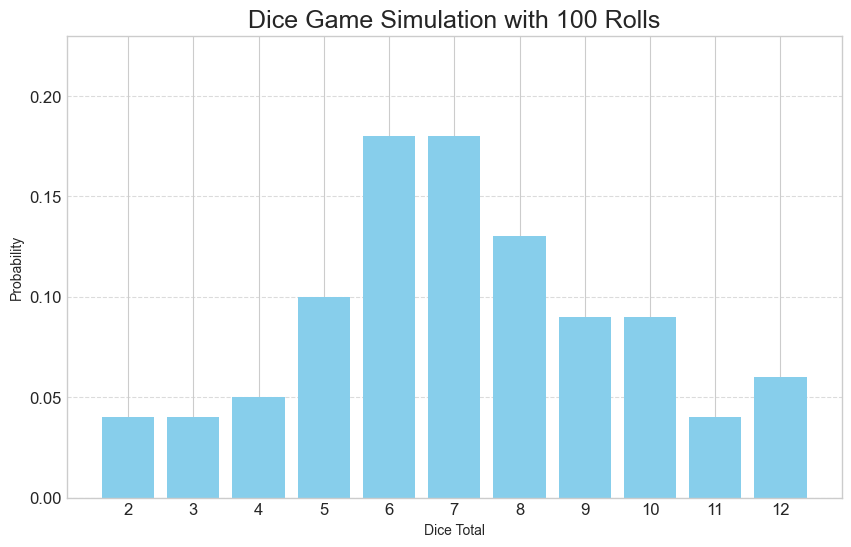

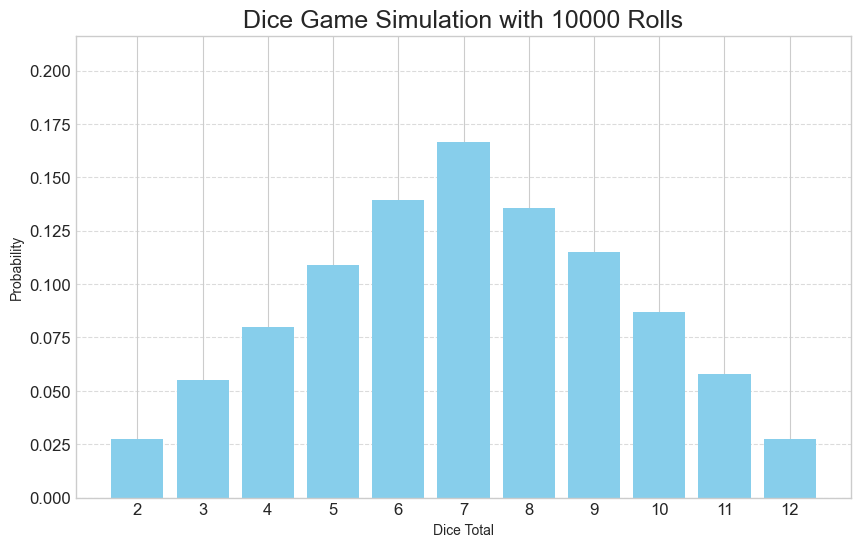

In [12]:
# Распределение суммы очков на двух кубиках

def simulate_dice_game(num_rolls):
    outcomes = [0] * 11  # Будем записывать в список частоты исходов (от 2 до 12)
    for _ in range(num_rolls):
        dice1 = random.randint(1, 6)
        dice2 = random.randint(1, 6)
        total = dice1 + dice2
        outcomes[total - 2] += 1
    probabilities = [count / num_rolls for count in outcomes]
    
    #График
    outcomes_labels = [str(i+2) for i in range(11)]
    plt.figure(figsize=(10, 6))
    plt.bar(outcomes_labels, probabilities, color='skyblue')
    plt.xlabel('Dice Total')
    plt.ylabel('Probability')
    plt.title(f'Dice Game Simulation with {num_rolls} Rolls')
    plt.ylim(0, max(probabilities) + 0.05)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
    return outcomes, probabilities

num_rolls = 100
outcomes, probabilities = simulate_dice_game(num_rolls)

num_rolls = 10000
outcomes, probabilities = simulate_dice_game(num_rolls)

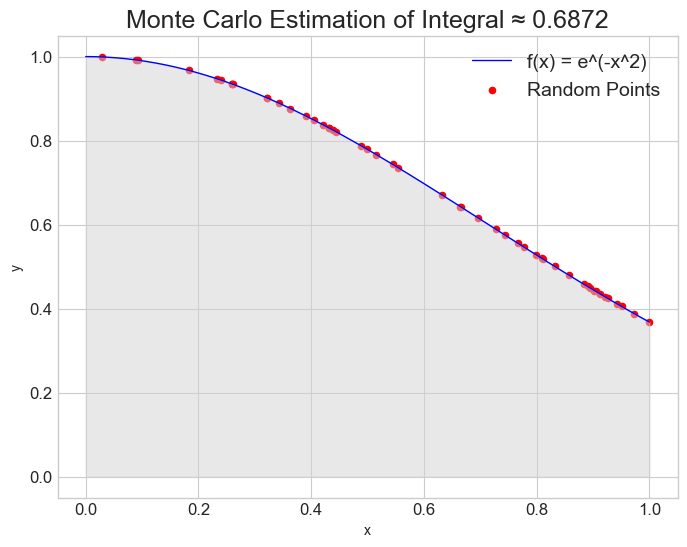

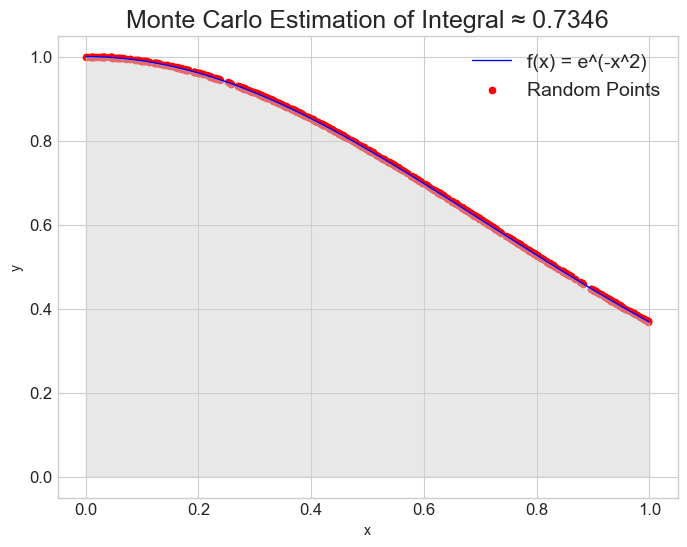

In [13]:
# Вычисления интегралов

def monte_carlo_integration(num_points):
    # Попробуем оценить интеграл: f: f(x) = e^(-x^2)
    def f(x):
        return 2.71828**(-x**2)
    # На интервале: [0, 1]
    a, b = 0, 1

    # Переменная для хранения текущей оценки интеграла
    integral_estimate = 0

    # Сохраним рандомные точки для графика
    x_points = []
    y_points = []

    # Симуляция
    for _ in range(num_points):
        x = random.uniform(a, b)
        y = f(x)
        integral_estimate += y
        
        x_points.append(x)
        y_points.append(y)

    # Выччислим значение интеграла
    integral_estimate *= (b - a) / num_points

    # Сгененирируем значения x для отрисовки
    x_values = np.linspace(a, b, 400)
    y_values = [f(x) for x in x_values]

    
    plt.figure(figsize=(8, 6))
    plt.plot(x_values, y_values, label='f(x) = e^(-x^2)', color='blue')
    plt.scatter(x_points, y_points, color='red', s=20, label='Random Points')
    plt.fill_between(x_values, y_values, color='lightgray', alpha=0.5)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'Monte Carlo Estimation of Integral ≈ {integral_estimate:.4f}')
    plt.legend()
    plt.grid(True)
    plt.show()


num_points = 50
monte_carlo_integration(num_points)

num_points = 500
monte_carlo_integration(num_points)

## ПРАКТИКА: прогноз выручки кофейни

Будем работать с данными, которые содержат покупки напитков в кофейне с марта 2024 по март 2025 года <br>

Данные и их описание: <https://www.kaggle.com/datasets/navjotkaushal/coffee-sales-dataset/data>


In [14]:
import pandas as pd

df = pd.read_csv("Coffe_sales.csv")
df

,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time
0,10,card,38.70,Latte,Morning,Fri,Mar,5,3,2024-03-01,10:15:50.520000
1,12,card,38.70,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:19:22.539000
2,12,card,38.70,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:20:18.089000
3,13,card,28.90,Americano,Afternoon,Fri,Mar,5,3,2024-03-01,13:46:33.006000
4,13,card,38.70,Latte,Afternoon,Fri,Mar,5,3,2024-03-01,13:48:14.626000
...,...,...,...,...,...,...,...,...,...,...,...
3542,10,card,35.76,Cappuccino,Morning,Sun,Mar,7,3,2025-03-23,10:34:54.894000
3543,14,card,35.76,Cocoa,Afternoon,Sun,Mar,7,3,2025-03-23,14:43:37.362000
3544,14,card,35.76,Cocoa,Afternoon,Sun,Mar,7,3,2025-03-23,14:44:16.864000
3545,15,card,25.96,Americano,Afternoon,Sun,Mar,7,3,2025-03-23,15:47:28.723000


Нас, большей частью, интересует поток посетителей, а если быть точнее: выручка <br>

В датасете представлено не так много признаков: по факту мы имеем наименование напитка, дату и время, а также сумму чека <br>

Попробуем поработать с таким таргетом как выручка кофейни за день

### TASK 0
Разделите выборку на две части

Поместите  март 2025 в один датафрейм (это будет выборка для валидации)

Все остальные наблюдения - в другой (это будет "обучающая")

Далее будем работать с "обучающей" выборкой

In [15]:
df_val = df.query("Date >= '2025-03-01'").reset_index(drop=True)
df_train = df.query("Date < '2025-03-01'").reset_index(drop=True)

### TASK 1

Создайте датафрейм с выручкой кофейни за день и визуализируйте частоту встречаемых значений

Для этого можете воспользоваться функцией plt.hist с параметром density=True, поэксперементировав с параметром bins

Похоже ли данное распределение на какое-либо из известных Вам? На какое?

А если взять логарифм?

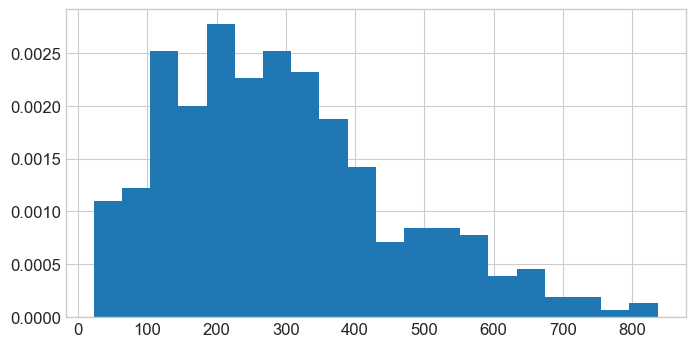

In [16]:
df_rev = df[['Date', 'money']].groupby(by='Date').agg("sum")
df_rev = df_rev.rename(columns={'money': 'daily_revenue'})
plt.hist(df_rev, bins=20, density=True)
plt.show()

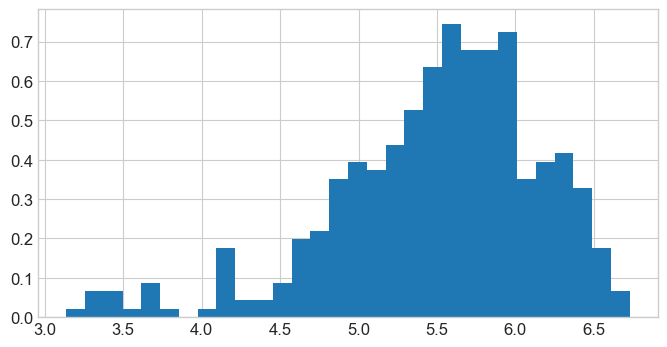

In [17]:
df_rev_log = df_rev.copy()
df_rev_log['log_revenue'] = np.log(df_rev_log['daily_revenue'])
plt.hist(df_rev_log['log_revenue'], bins=30, density=True)
plt.show()

### TASK 2
* Попробуйте смоделировать распределение, которое наилучшим образом описывает выручку кофейни за день (ну или ее логарифм)
* Постройте теоретический график распределения вероятностей и наложите его на эмпирический
* На Ваш взгляд, достаточно ли они схожи?

In [38]:
mu, sigma = stats.norm.fit(df_rev["daily_revenue"])
x = np.linspace(df_rev["daily_revenue"].min(), df_rev["daily_revenue"].max(), 200)
y_norm = stats.norm.pdf(x, mu, sigma)

ks_stat, ks_p = stats.kstest(df_rev["daily_revenue"], "norm", args=(mu, sigma))

fig = go.Figure()

fig.add_trace(
    go.Histogram(
        x=df_rev["daily_revenue"],
        histnorm="probability density",
        name="empiric",
        nbinsx=30,
    )
)

fig.add_trace(
    go.Scatter(
        x=x,
        y=y_norm,
        mode="lines",
        name=f"norm distr (μ={mu:.1f}, σ={sigma:.1f})",
    )
)

fig.update_layout(
    title=f"Normal distribution vs Revenue | KS-тест p-value = {ks_p:.4f}",
    xaxis_title="Revenue",
    yaxis_title="Probability density",
)

fig.show()

In [43]:
shape, loc, scale = stats.lognorm.fit(df_rev["daily_revenue"])
x = np.linspace(df_rev["daily_revenue"].min(), df_rev["daily_revenue"].max(), 200)
y_lognorm = stats.lognorm.pdf(x, shape, loc, scale)

ks_stat, ks_p = stats.kstest(
    df_rev["daily_revenue"], "lognorm", args=(shape, loc, scale)
)

fig = go.Figure()

fig.add_trace(
    go.Histogram(
        x=df_rev["daily_revenue"],
        histnorm="probability density",
        name="empiric",
        nbinsx=30,
    )
)

fig.add_trace(
    go.Scatter(
        x=x,
        y=y_lognorm,
        mode="lines",
        name=f"lognorm distr (s={shape:.2f})",
    )
)

fig.update_layout(
    title=f"Lognormal distribution vs Revenue | KS-тест p-value = {ks_p:.4f}",
    xaxis_title="Revenue",
    yaxis_title="Probability density",
)

fig.show()

In [44]:
alpha, loc, beta = stats.gamma.fit(df_rev['daily_revenue'])
x = np.linspace(df_rev['daily_revenue'].min(), df_rev['daily_revenue'].max(), 200)
y_gamma = stats.gamma.pdf(x, alpha, loc, beta)

ks_stat, ks_p = stats.kstest(df_rev['daily_revenue'], 'gamma', args=(alpha, loc, beta))

fig = go.Figure()

fig.add_trace(go.Histogram(
    x=df_rev['daily_revenue'],
    histnorm='probability density',
    name='empiric',
    nbinsx=30,
))

fig.add_trace(go.Scatter(
    x=x, y=y_gamma,
    mode='lines',
    name=f'gamma distr (α={alpha:.2f}, β={beta:.2f})',
))

fig.update_layout(
    title=f'Gamma distribution vs Revenue | KS-тест p-value = {ks_p:.4f}',
    xaxis_title='Revenue',
    yaxis_title='Probability density',
)

fig.show()

In [ ]:
mu_log, sigma_log = stats.norm.fit(df_rev_log["log_revenue"])
x_log = np.linspace(
    df_rev_log["log_revenue"].min(), df_rev_log["log_revenue"].max(), 200
)
y_norm_log = stats.norm.pdf(x_log, mu_log, sigma_log)

ks_stat, ks_p = stats.kstest(
    df_rev_log["log_revenue"], "norm", args=(mu_log, sigma_log)
)

fig = go.Figure()

fig.add_trace(
    go.Histogram(
        x=df_rev_log["log_revenue"],
        histnorm="probability density",
        name="Log Revenue",
        nbinsx=30,
    )
)

fig.add_trace(
    go.Scatter(
        x=x_log,
        y=y_norm_log,
        mode="lines",
        name=f"norm distr (μ={mu_log:.2f}, σ={sigma_log:.2f})",
    )
)

fig.update_layout(
    title=f"Normal distribution vs Log Revenue | KS-тест p-value = {ks_p:.4f}",
    xaxis_title="Log Revenue",
    yaxis_title="Probability density",
)

fig.show()

In [51]:
df_t, loc_t, scale_t = stats.t.fit(df_rev_log["log_revenue"])
x_log = np.linspace(
    df_rev_log["log_revenue"].min(), df_rev_log["log_revenue"].max(), 200
)
y_t = stats.t.pdf(x_log, df_t, loc_t, scale_t)

ks_stat, ks_p = stats.kstest(
    df_rev_log["log_revenue"], "t", args=(df_t, loc_t, scale_t)
)

fig = go.Figure()

fig.add_trace(
    go.Histogram(
        x=df_rev_log["log_revenue"],
        histnorm="probability density",
        name="Log Revenue",
        nbinsx=30,
    )
)

fig.add_trace(
    go.Scatter(
        x=x_log,
        y=y_t,
        mode="lines",
        name=f"t-distr (df={df_t:.1f})",
    )
)

fig.update_layout(
    title=f"t-distribution vs Log Revenue | KS-тест p-value = {ks_p:.4f}",
    xaxis_title="Log Revenue",
    yaxis_title="Probability density",
)

fig.show()

In [ ]:
loc_laplace, scale_laplace = stats.laplace.fit(df_rev_log['log_revenue'])
x_log = np.linspace(df_rev_log['log_revenue'].min(), df_rev_log['log_revenue'].max(), 200)
y_laplace = stats.laplace.pdf(x_log, loc_laplace, scale_laplace)

ks_stat, ks_p = stats.kstest(df_rev_log['log_revenue'], 'laplace', args=(loc_laplace, scale_laplace))

fig = go.Figure()

fig.add_trace(go.Histogram(
    x=df_rev_log['log_revenue'],
    histnorm='probability density',
    name='Log Revenue',
    nbinsx=30,
))

fig.add_trace(go.Scatter(
    x=x_log, y=y_laplace,
    mode='lines',
    name=f'laplace distr (μ={loc_laplace:.2f}, σ={scale_laplace:.2f})',
))

fig.update_layout(
    title=f'Laplace distribution vs Log Revenue | KS-тест p-value = {ks_p:.4f}',
    xaxis_title='Log Revenue',
    yaxis_title='Probability density',
)

fig.show()

### TASK 3

Попробуйте сделать прогноз с помощью получившейся модели: какова будет средняя выручка кофейни в течение следующего одного дня, пяти дней, десяти дней, двадцати восьми дней?

* Рекомендуем использовать метод Монте-Карло: генерировать из получившегося распределения выручку n раз, где n - кол-во дней
* Для более устойчивых результатов предыдущий шаг можно повторить несколько раз и взять среднюю величину (ну или построить доверительный интервал, если знаете как:)


* Оцените качество прогноза
* Устроил бы Вас в этой задаче такой результат?

In [69]:
class LogNormalForecaster:
    def __init__(self, n_simulations=10000):
        self.n_simulations = n_simulations
        self.fitted_params = None
        self.is_fitted = False
        
    def fit(self, data):
        shape, loc, scale = stats.lognorm.fit(data)
        self.fitted_params = {
            'shape': shape,
            'loc': loc,
            'scale': scale
        }
        self.is_fitted = True
        
        self.mu_log = np.log(scale)
        self.sigma_log = shape     
        
        return self
    
    def predict_daily(self, n_days=1):
        if not self.is_fitted:
            raise ValueError("not fitted")
            
        log_revenues = np.random.normal(
            self.mu_log, 
            self.sigma_log, 
            size=(self.n_simulations, n_days)
        )
        
        daily_revenues = np.exp(log_revenues)
        
        return daily_revenues
    
    def predict(self, periods=[1, 5, 10, 28]):
        if not self.is_fitted:
            raise ValueError("not fitted")
            
        forecasts = {}
        
        for period in periods:
            daily_revenues = self.predict_daily(period)
            
            total_revenues = np.sum(daily_revenues, axis=1)
            
            avg_daily_revenues = np.mean(daily_revenues, axis=1)
            
            forecasts[period] = {
                'total_revenue': total_revenues,
                'avg_daily_revenue': avg_daily_revenues,
                'daily_revenues': daily_revenues
            }
        
        return forecasts


In [70]:
forecaster = LogNormalForecaster(n_simulations=10000)
forecaster.fit(df_rev['daily_revenue'])

periods = [1, 5, 10, 28]
forecasts = forecaster.predict(periods)

In [71]:
fig = make_subplots(
    rows=2,
    cols=2,
    subplot_titles=[f"Прогноз на {period} дней" for period in periods],
    vertical_spacing=0.12,
    horizontal_spacing=0.1,
)

colors = ["lightblue", "lightgreen", "lightcoral", "lightsalmon"]

for i, period in enumerate(periods):
    row = i // 2 + 1
    col = i % 2 + 1

    total_revenue = forecasts[period]["total_revenue"]

    fig.add_trace(
        go.Histogram(
            x=total_revenue,
            nbinsx=50,
            name=f"{period} дней",
            marker_color=colors[i],
            showlegend=False,
        ),
        row=row,
        col=col,
    )

fig.update_layout(
    title="Распределение прогнозируемой суммарной выручки (Логнормальная модель)",
)

fig.show()

### TASK 4
Давайте чуть детальнее посмотрим на выборку

Проведите разведочный анализ данных

Некоторые идеи:

* В какие дни покупают больше напитков?
* В какое время?
* Одинакова ли цена на напитки в рассматриваемый временной промежуток?
* Как ведут себя частоты покупки разных напитков? (попробуйте нарисовать график, аналогичный прошлому заданию)
* Есть ли в выборке выбросы, стоит ли их удалять?

Какие выводы Вы можете сделать на основе проведенного анализа?

In [77]:
df

,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time
0,10,card,38.70,Latte,Morning,Fri,Mar,5,3,2024-03-01,10:15:50.520000
1,12,card,38.70,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:19:22.539000
2,12,card,38.70,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:20:18.089000
3,13,card,28.90,Americano,Afternoon,Fri,Mar,5,3,2024-03-01,13:46:33.006000
4,13,card,38.70,Latte,Afternoon,Fri,Mar,5,3,2024-03-01,13:48:14.626000
...,...,...,...,...,...,...,...,...,...,...,...
3542,10,card,35.76,Cappuccino,Morning,Sun,Mar,7,3,2025-03-23,10:34:54.894000
3543,14,card,35.76,Cocoa,Afternoon,Sun,Mar,7,3,2025-03-23,14:43:37.362000
3544,14,card,35.76,Cocoa,Afternoon,Sun,Mar,7,3,2025-03-23,14:44:16.864000
3545,15,card,25.96,Americano,Afternoon,Sun,Mar,7,3,2025-03-23,15:47:28.723000


In [87]:
px.histogram(df['Weekday'], title='В какие дни покупают больше напитков?')

In [86]:
px.histogram(df['hour_of_day'], title='В какое время?')

In [96]:
coffee_prices = (
    df[["coffee_name", "money"]].groupby("coffee_name").agg("mean").reset_index()
)
px.histogram(
    x=coffee_prices["coffee_name"],
    y=coffee_prices["money"],
    title="Одинакова ли цена на напитки в рассматриваемый временной промежуток?",
)
# px.scatter(
#     x=df["coffee_name"],
#     y=df["money"],
#     title="Одинакова ли цена на напитки в рассматриваемый временной промежуток?",
# )

### TASK 5 (OPTIONAL)

Сделайте попытку более качественно смоделировать распределение, учитывая факты, которые Вы узнали из разведочного анализа данных
(Если не получится - это ок)

Hints:
* Может быть оно не одинаково в зависимости от напитка?
* Или от времени и дня недели?
* Или стоит моделировать количество покупок и цену отдельно...
* А вообще здесь свобода творчества!

In [67]:
### YOUR CODE HERE